<a href="https://colab.research.google.com/github/AlexanderAmaya1/MAT-421-Homework/blob/main/Module_B_Alexander_Amaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module B: Interpolation
Alexander Amaya

## 17.1: Interpolation Problem Statement

Graph styles available:
['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Test Graph:


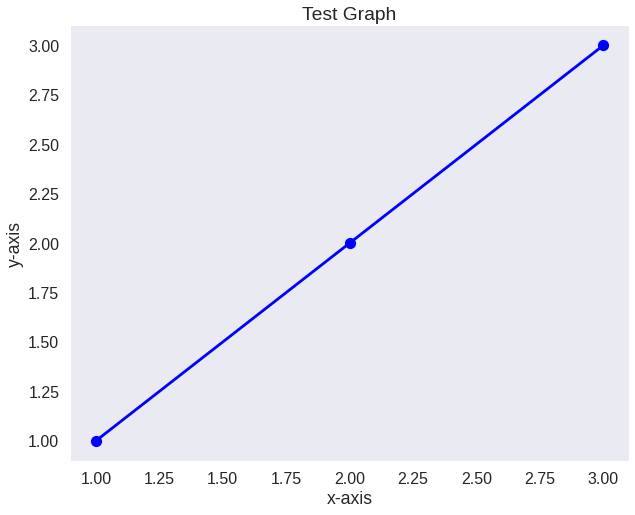

In [8]:
import matplotlib.pyplot as plt

print("Graph styles available:")
print(plt.style.available)
print('\n')

# This creates a graph of the supplied data sets and graph attributes.
def graph_function(x_data, y_data, x_label, y_label, title):
  
  plt.style.use("seaborn-deep")
  plt.figure(figsize=(10,8))
  plt.plot(x_data, y_data, '-ob')
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label) 
  plt.show()


# Creation of Test Graph (no interpolation)
x = [1,2,3]
y = [1,2,3]


print('Test Graph:')

graph_function(x_data = x, y_data = y, x_label='x-axis', y_label='y-axis', title='Test Graph')



Interpolation is a method used to predict a new point between two of the existing points in a data set. This is a data set where the x-axis consists of independent data values and the y-axis is the dependent data values. 

In the script above, I familiarize myself with the Python graphing functionality that I will use to demonstrate interpolation in the other examples. 



---



## 17.2: Linear Interpolation

y_hat = 2.5




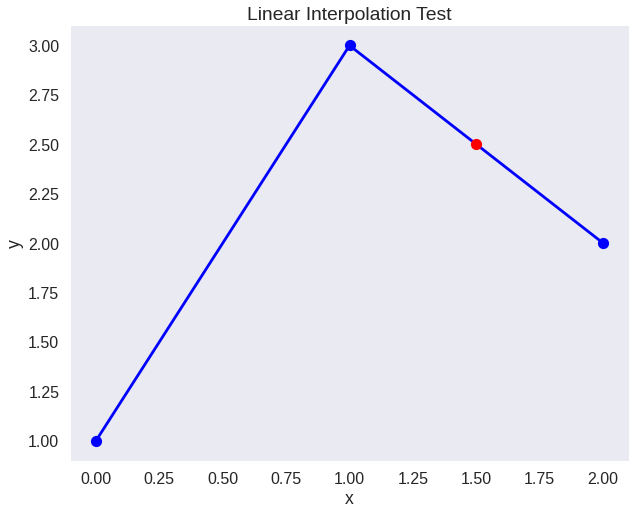

In [30]:
from scipy.interpolate import interp1d 
import matplotlib.pyplot as plt

# This creates a graph of the supplied data sets and graph attributes.
def graph_function(x_data, y_data, x_label, y_label, title):
  
  plt.style.use("seaborn-deep")
  plt.figure(figsize=(10,8))
  plt.plot(x_data, y_data, '-ob')
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label) 
  


# This function calculates and plots the linear intepolation of the x-coordinate given a data set
def linear_interpolation(x_point, x_data, y_data):
  # Finds left point (x_i,y_i)
  i = 0
  left_point_x = 0
  left_point_y = 0
  for val in x_data:
    if val < x_point:
      left_point_x = val
      left_point_y = y_data[i]
      i += 1
    else:
      break
  #print(str(left_point_x)+', '+str(left_point_y))
  # Finds right point (x_i+1,y_i+1)
  i = 0
  right_point_x = 0
  right_point_y = 0
  for val in x_data:
    if val > x_point:
      right_point_x = val
      right_point_y = y_data[i]
      break
    else:
      i += 1

  # linear interpolation formula
  y_hat = left_point_y + ((right_point_y-left_point_y)*(x_point - left_point_x)) / (right_point_x-left_point_x)

  print("y_hat = "+str(y_hat)+"\n\n")

  # Plot it on the graph
  plt.plot(x_point, y_hat, 'ro')




# Testing using the data set from the textbook
x = [0, 1, 2]
y = [1, 3, 2]

graph_function(x,y,"x","y","Linear Interpolation Test")

linear_interpolation(1.5,x,y)




The Python example above manually implements the linear interplation function that was shown off in the textbook. 
The graph resulting graph is identical to the one in the textbook, this supports the correctness of my implementation.

This interplation function uses the following linear interpolation formula: 

$\hat{y}(x)=y_i+\frac{(y_{i+1}−y_i)(x−x_i)}{(x_{i+1} − x_i)} $



---



## 17.3: Cubic Spline Interpolation

[[-0.75]
 [ 0.  ]
 [ 2.75]
 [ 1.  ]
 [ 0.75]
 [-4.5 ]
 [ 7.25]
 [-0.5 ]]





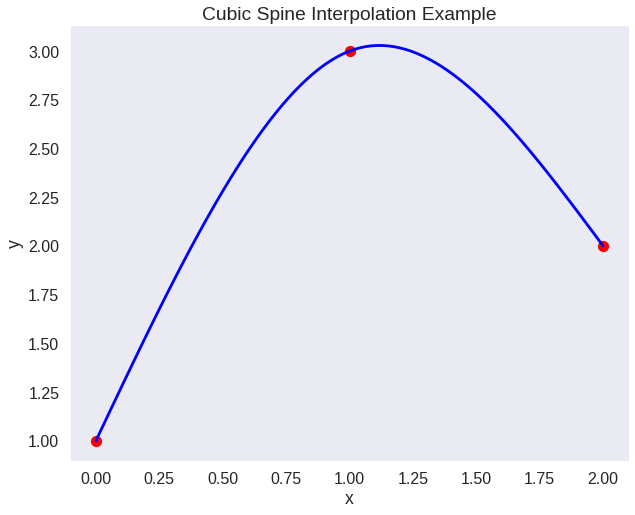

In [50]:
import matplotlib.pyplot as plt
import numpy as np


def graph_function(x_data, y_data, x_label, y_label, title):
  
  plt.style.use("seaborn-deep")
  plt.figure(figsize=(10,8))
  plt.plot(x_data, y_data, 'ro')
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label) 
  

# Cubic Interpolation for x and y data sets
def cubic_spline_interpolation(x_data,y_data):

  # Creation of the Matricies
  b = np.array([y_data[0], y_data[1], y_data[1], y_data[2], 0, 0, 0, 0])
  b = b[:, np.newaxis]
  A = np.array([
                [x_data[0]**3, x_data[0]**2, x_data[0]**1, 1, 0, 0, 0, 0], 
                [0, 0, 0, 0, x_data[1]**3, x_data[1]**2, x_data[1]**1, 1],

                [x_data[1]**3, x_data[1]**2, x_data[1]**1, 1, 0, 0, 0, 0], \
                [0, 0, 0, 0, x_data[2]**3, x_data[2]**2, x_data[2]**1, 1], 

                [3*x_data[1]**2, 2*x_data[1], 1, 0, -3*x_data[1]**2, -2*x_data[1], -1, 0], 
                [6*x_data[1], 2, 0, 0, -6*x_data[1], -2, 0, 0],\

                [6*x_data[0], 2, 0, 0, 0, 0, 0, 0], 
                [0, 0, 0, 0, 6*x_data[2], 2, 0, 0]])

  #Solving the Matricies
  coeffs = np.dot(np.linalg.inv(A), b)
  print(coeffs)
  print('\n\n')

  # Ploting the Resulting cubic functions
  x_new1 = np.linspace(x_data[0], x_data[1], 100)
  y_new1 = coeffs[0]*x_new1**3 + coeffs[1]*x_new1**2 + coeffs[2]*x_new1 + coeffs[3]
  plt.plot(x_new1,y_new1,'b')

  x_new2 = np.linspace(x_data[1], x_data[2], 100)
  y_new2 = coeffs[4]*x_new2**3 + coeffs[5]*x_new2**2 + coeffs[6]*x_new2 + coeffs[7]
  plt.plot(x_new2,y_new2,'b')



# Testing using the data set from the textbook

x = [0,1,2]
y = [1,3,2]

graph_function(x,y,'x','y','Cubic Spline Interpolation Example')
cubic_spline_interpolation(x,y)

The following example manually implements the cubic spline interpolation function that is discussed in the text book. The graph and resulting coefficients are identical to the ones displayed in the textbook, supporting the accuracy of my example. 